In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from tqdm import tqdm

import sys
sys.path.append("../src")

from data_prep import *
from make_cuts import *
from fitting_functions import *
from pulse_profile_generator import *
from plot_maker import *
from pulse_plot_maker import *

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
c_folder="../../data/calibration/"
d_folder="../../data/runData/"
r_n=287
pulsed=True

Path("../../plots").mkdir(parents=True, exist_ok=True)
Path("../../plots/run_"+str(r_n)).mkdir(parents=True, exist_ok=True)
p_folder="../../plots/run_"+str(r_n)+"/"

In [4]:
%%time
p,m,r=import_data(c_folder,d_folder, r_n, is_it_pulsed=pulsed)

CPU times: user 4.45 s, sys: 820 ms, total: 5.27 s
Wall time: 5.27 s


In [5]:
%%time
r=select_bars_with_data(r,p, subtract_pedestal=True, is_it_pulsed=pulsed) #this needs to be run as it's own cell

Number of events: 7800


Initial pedestal-based selection performed.
Events left: 7764


CPU times: user 264 ms, sys: 150 ms, total: 414 ms
Wall time: 412 ms


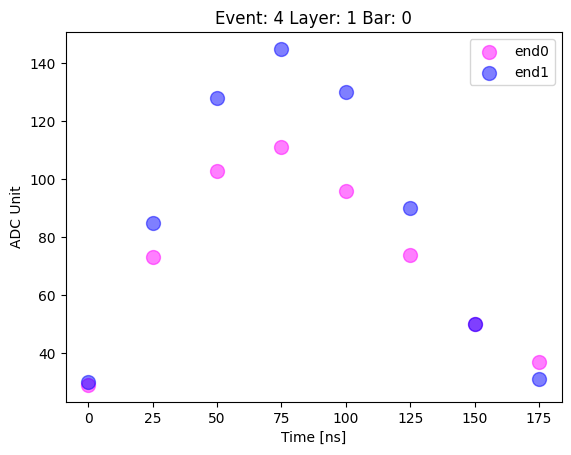

In [6]:
plot_pulse(4,r, p_folder,False)

In [7]:
# dropping unnecessary columns
r=pulse_drop_extra_cols(r, pulsed)

In [8]:
pulse_df=pd.read_csv(d_folder+"run_"+str(r_n)+"_pulse_problems.csv", index_col="index")

In [9]:
big_df=r.merge(pulse_df, left_index=True, right_index=True)

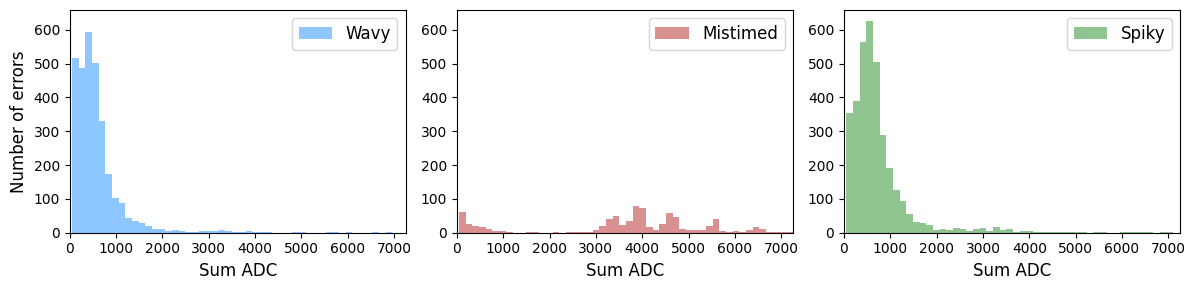

In [10]:
plot_error_by_energy(big_df, False,p_folder, False)

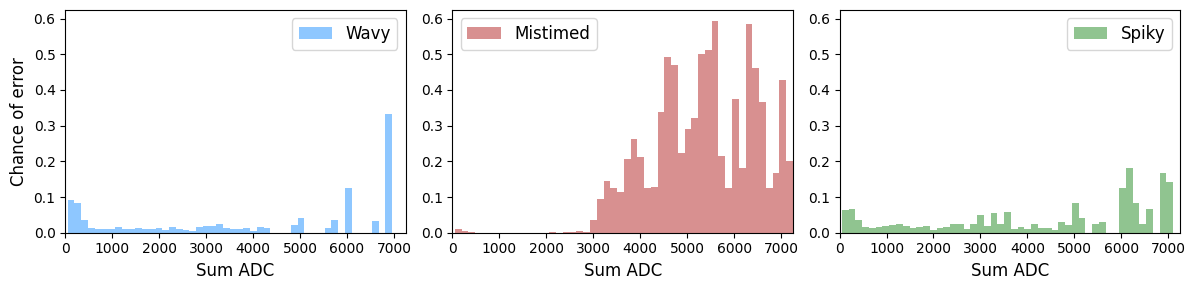

In [11]:
plot_error_by_energy(big_df, True,p_folder, False)

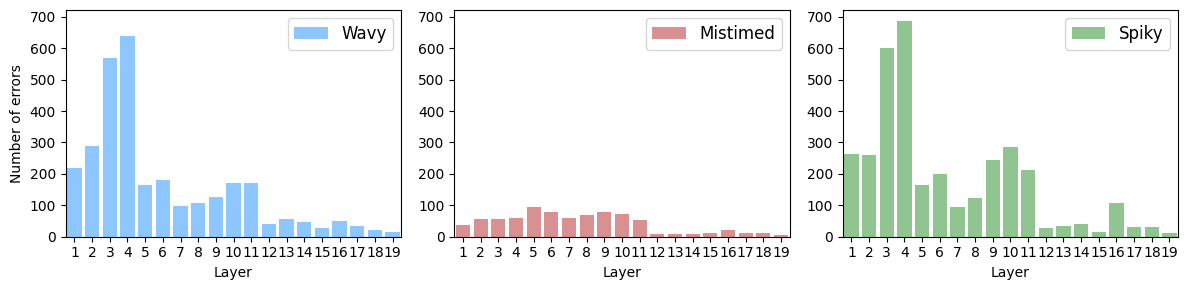

In [12]:
plot_error_by_layer(big_df, False, p_folder,False)

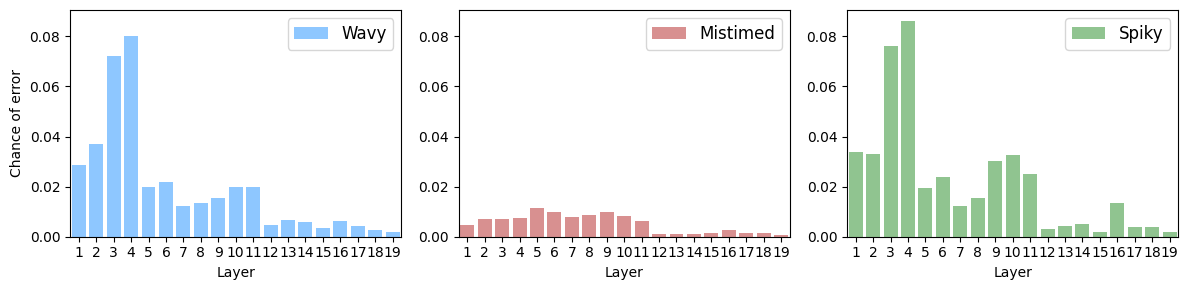

In [13]:
plot_error_by_layer(big_df, True,p_folder, False)

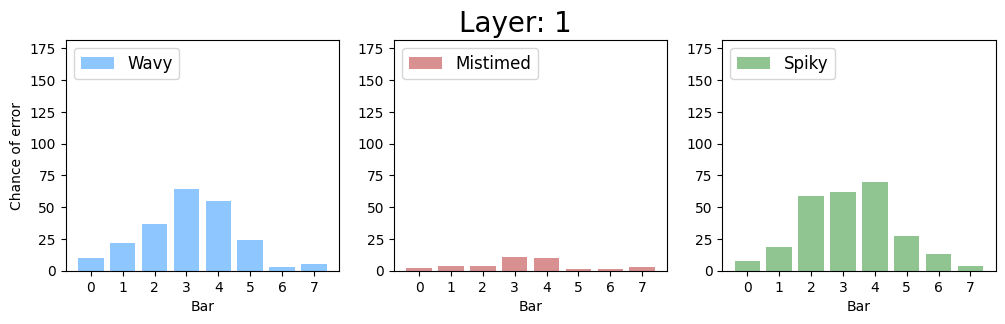

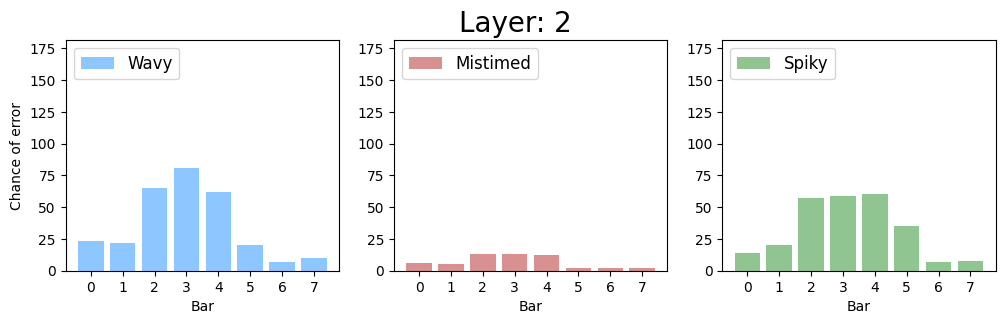

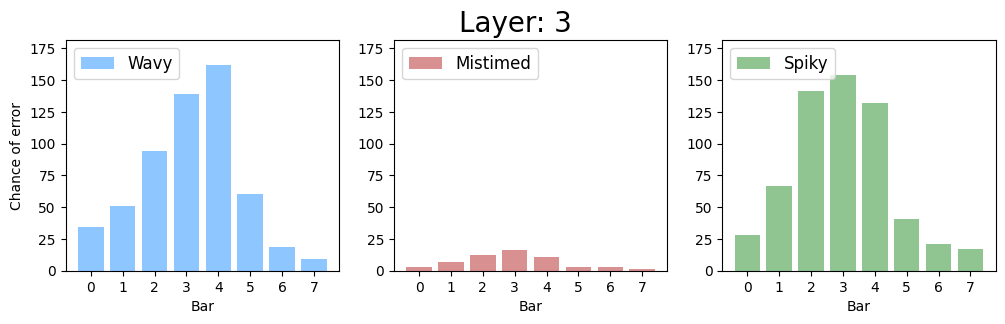

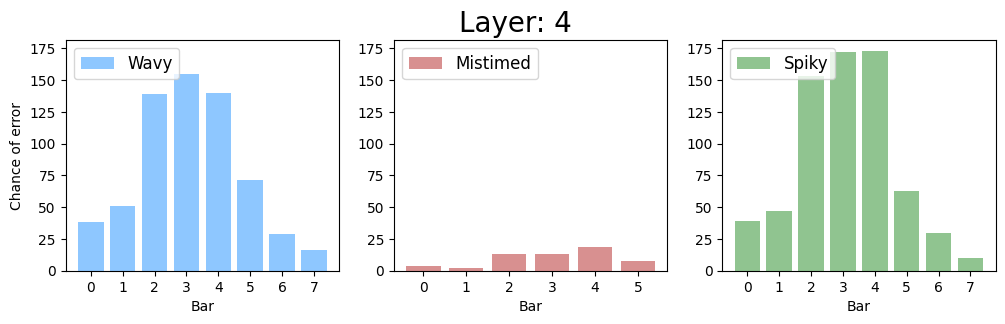

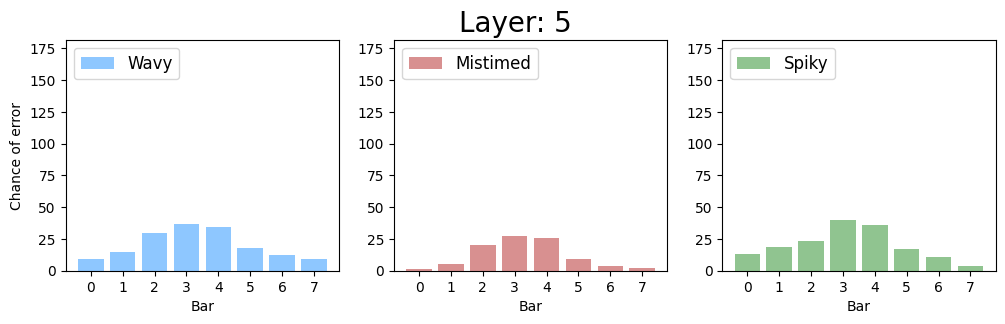

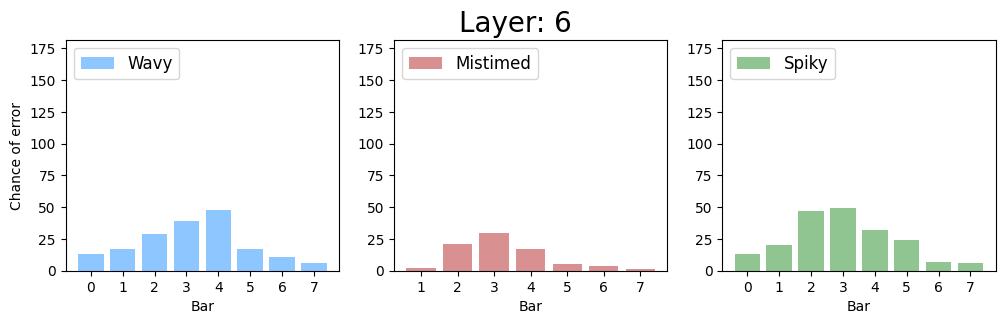

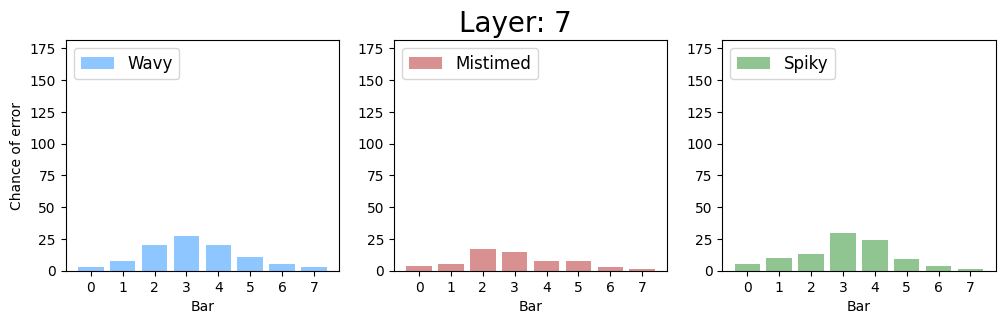

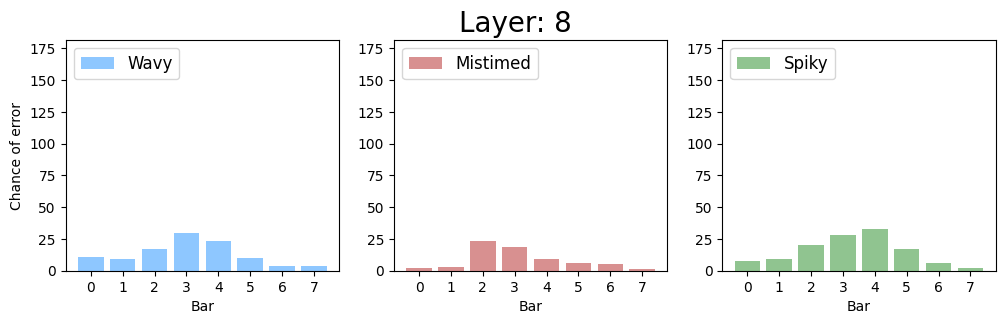

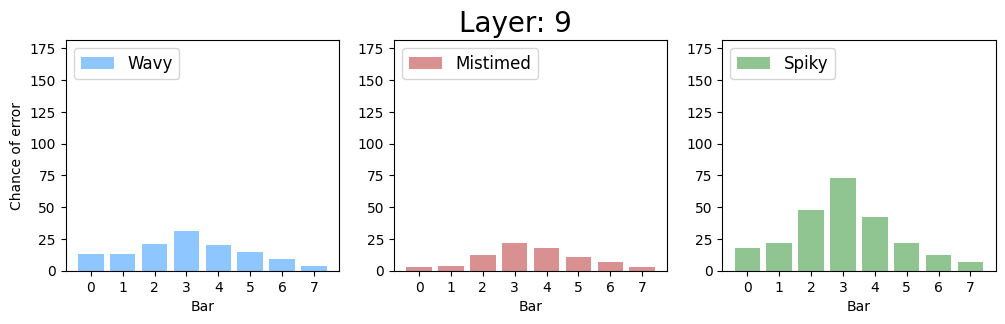

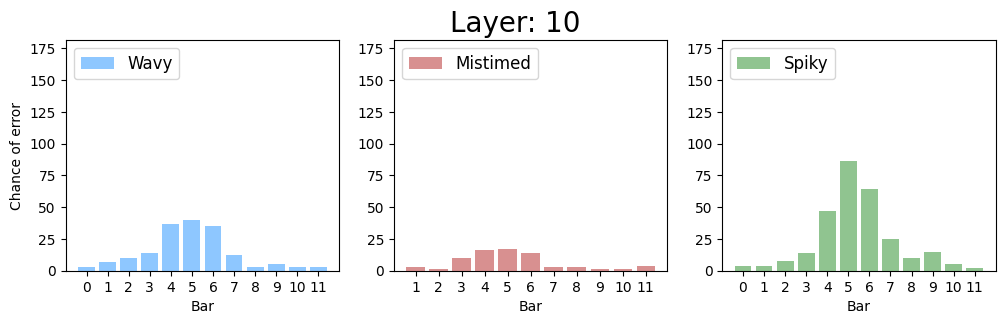

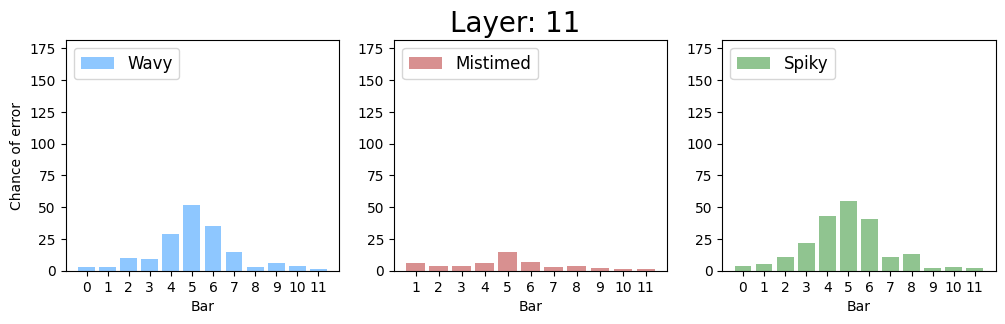

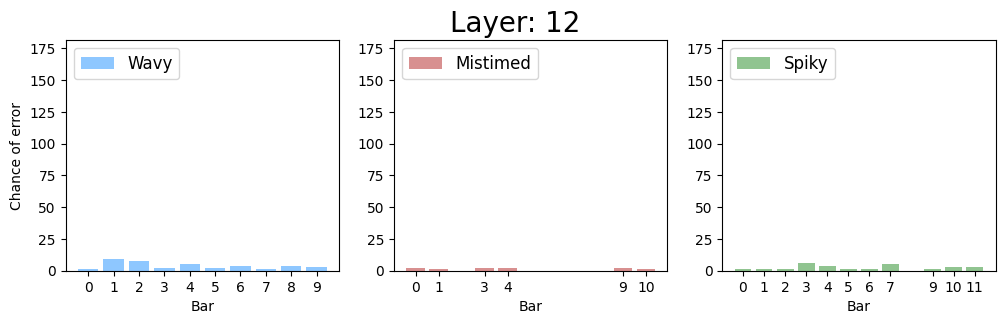

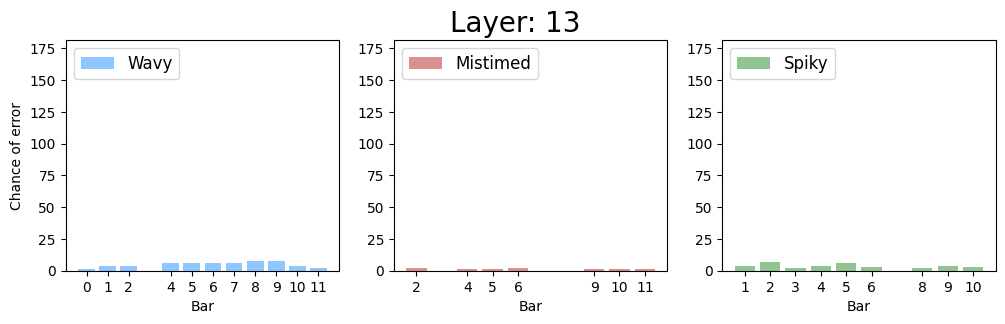

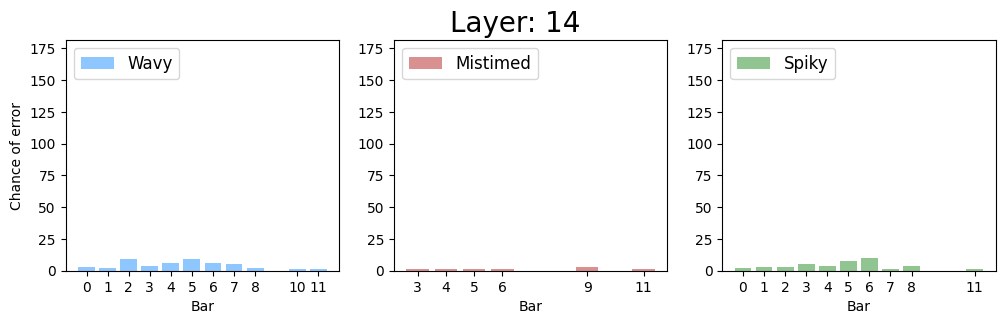

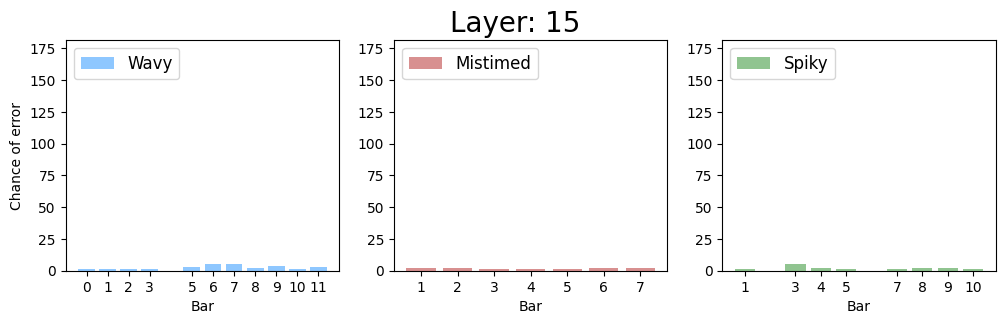

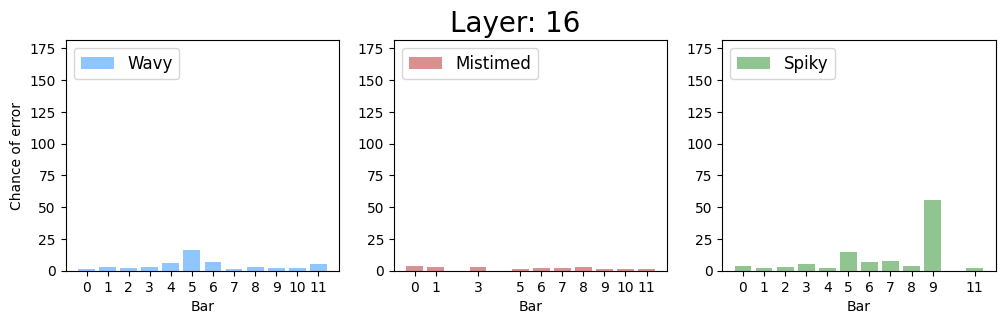

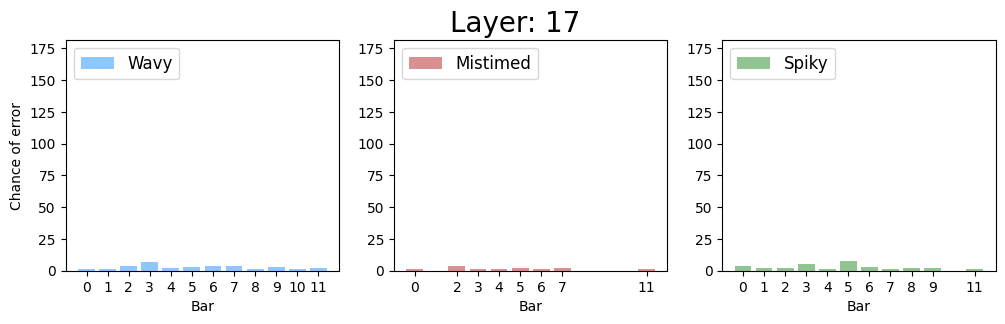

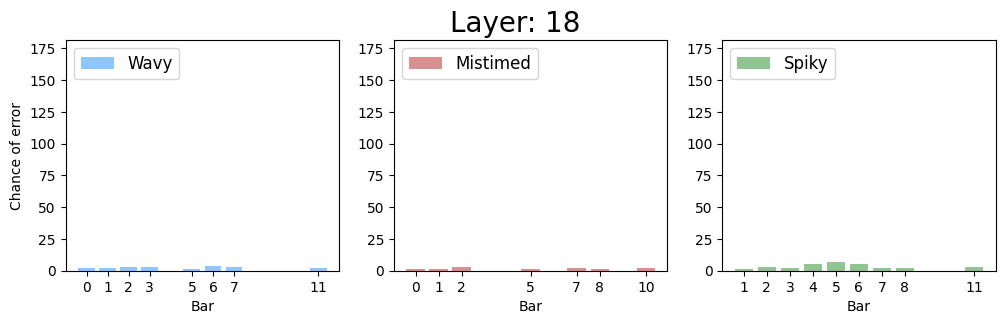

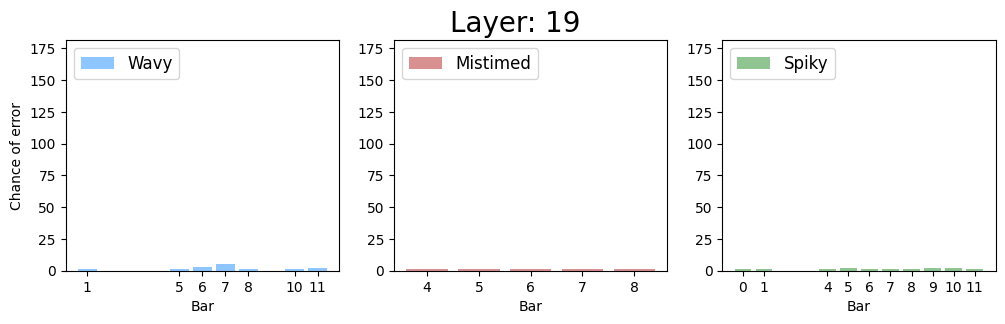

In [14]:
plot_error_by_bar(big_df, False,p_folder, False)

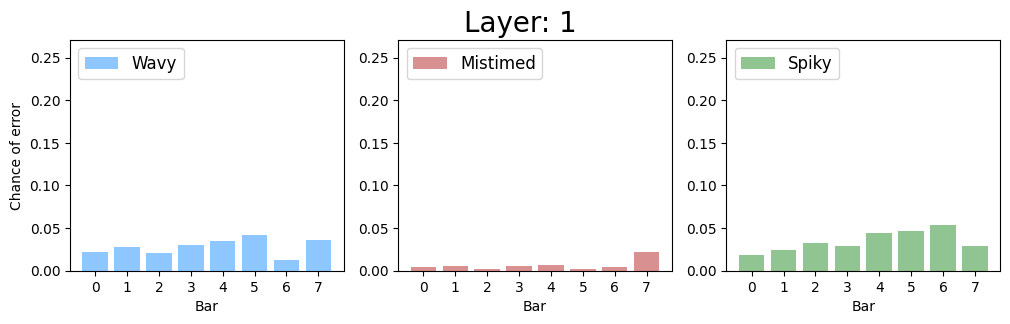

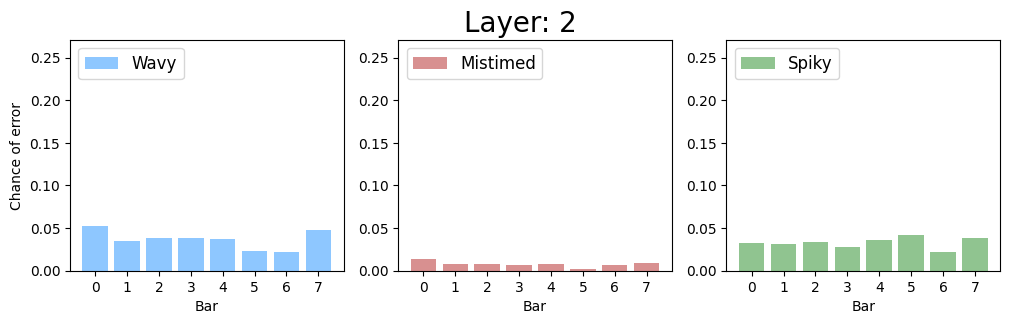

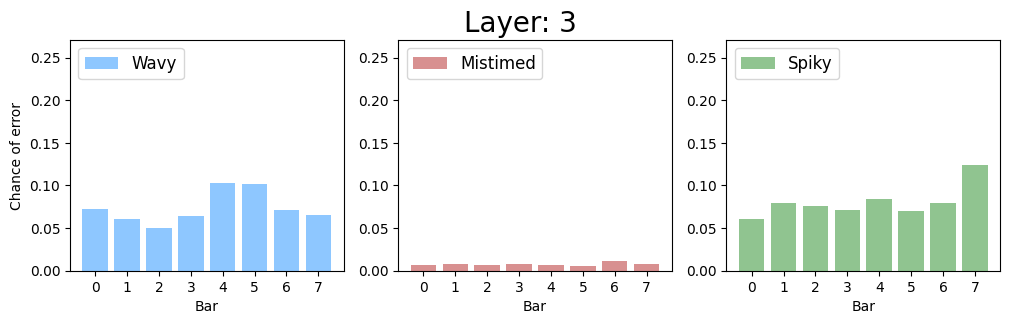

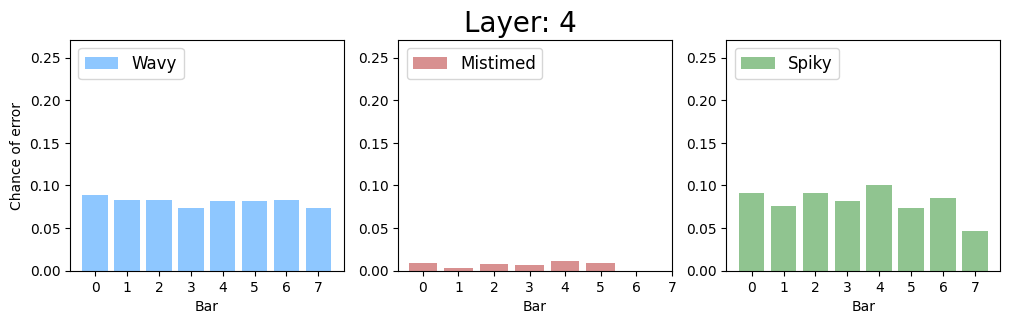

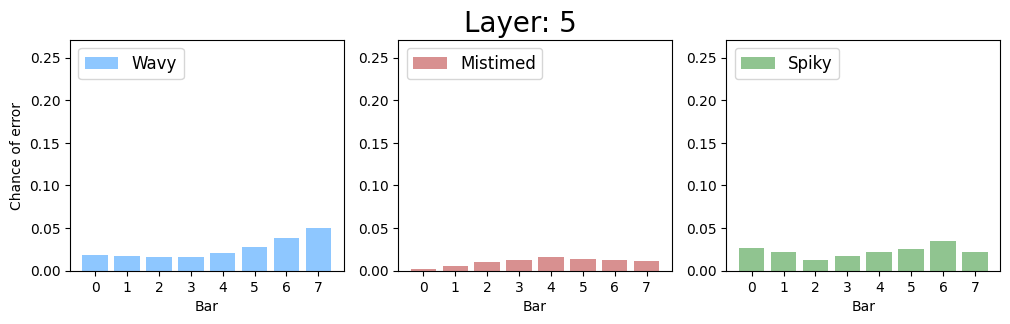

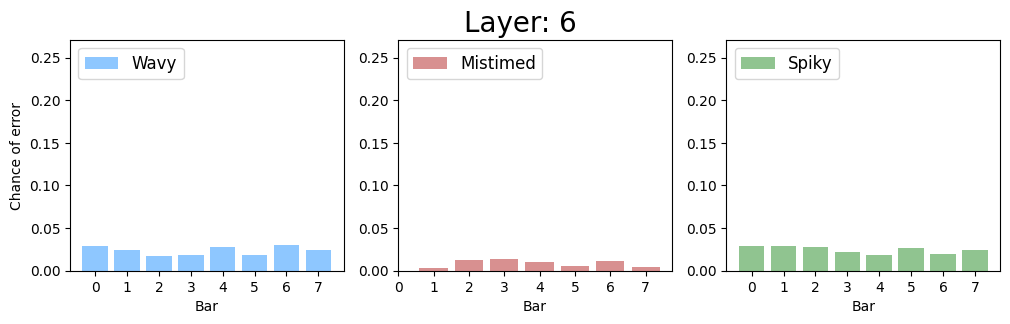

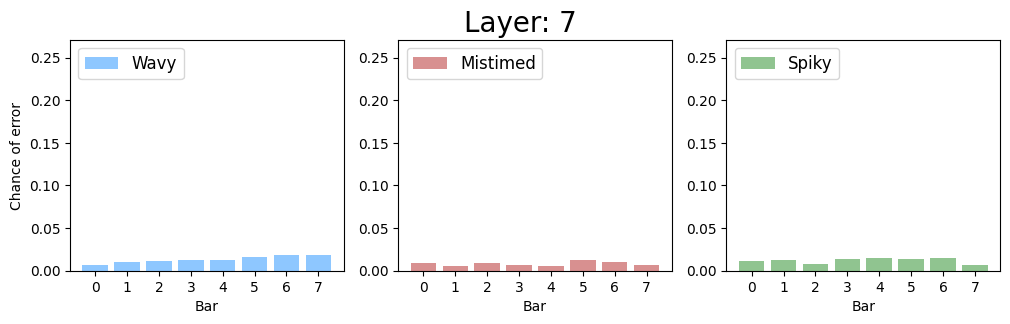

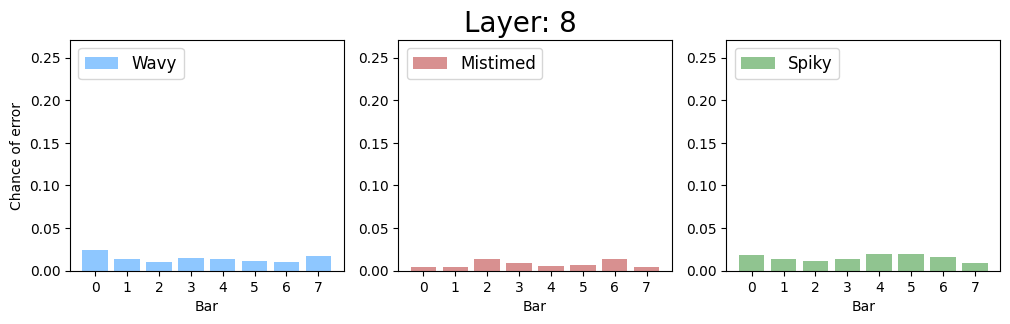

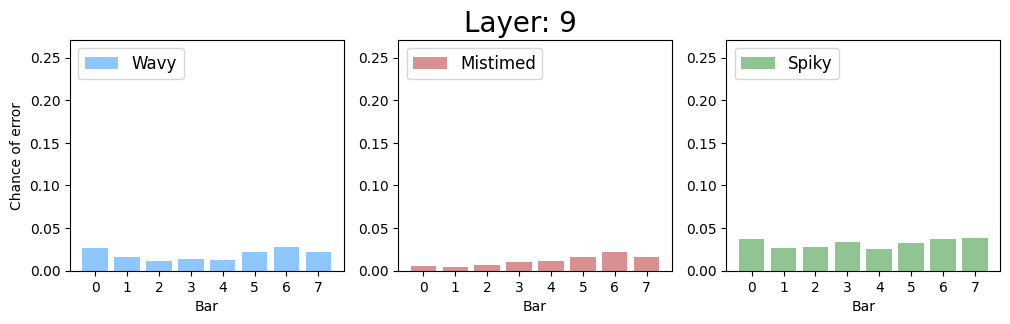

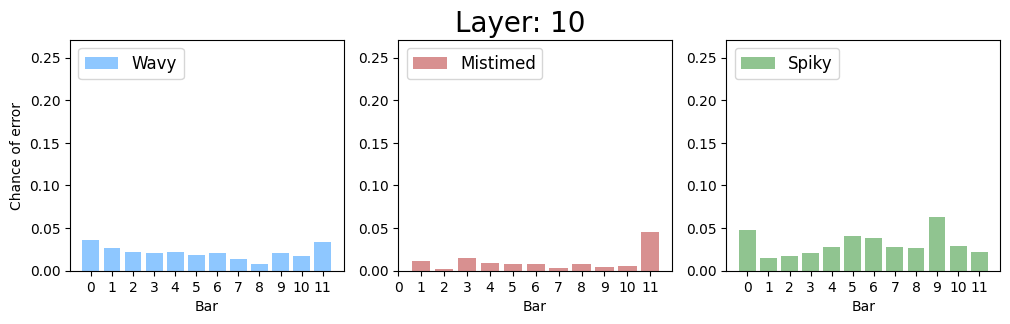

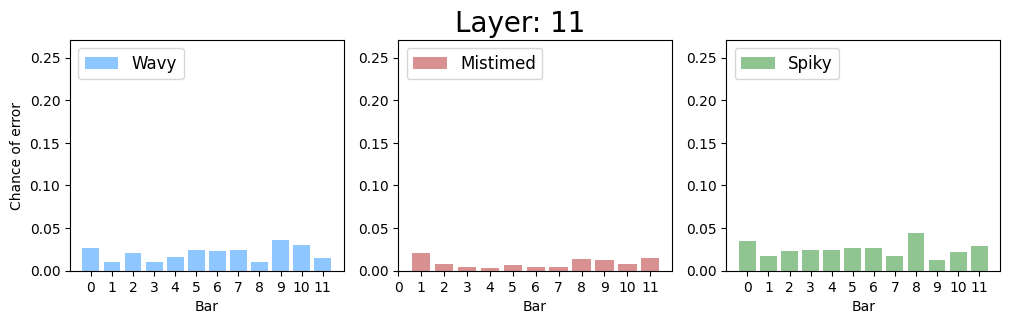

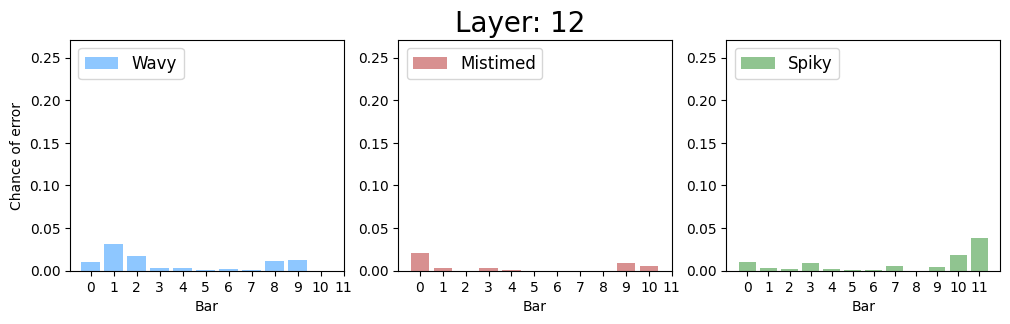

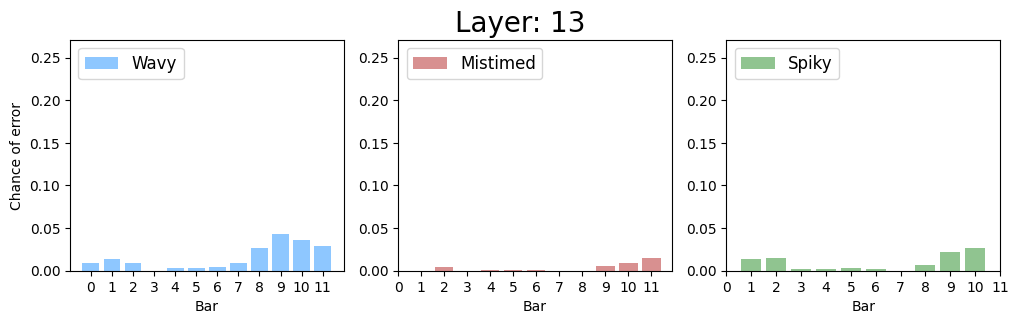

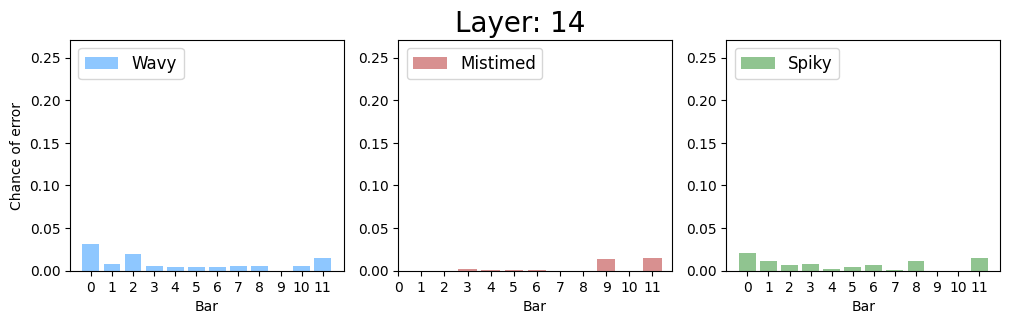

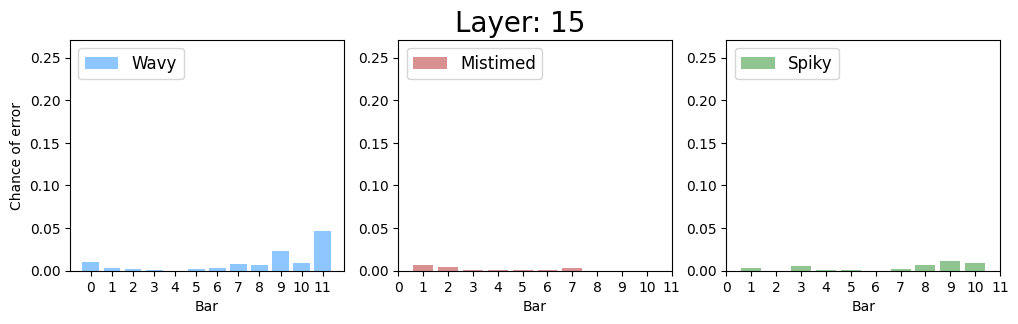

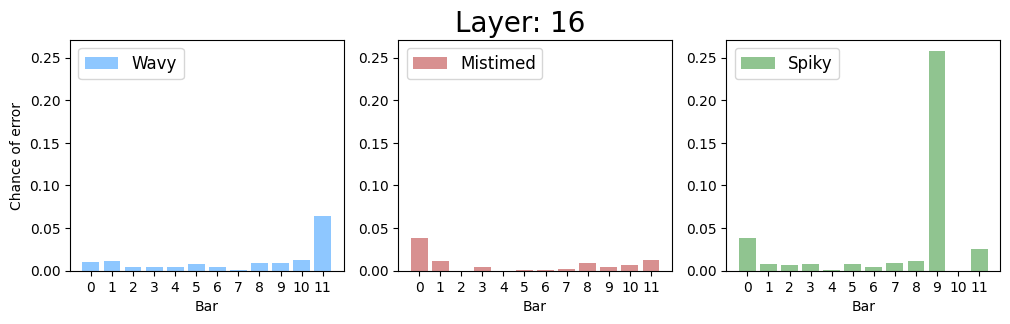

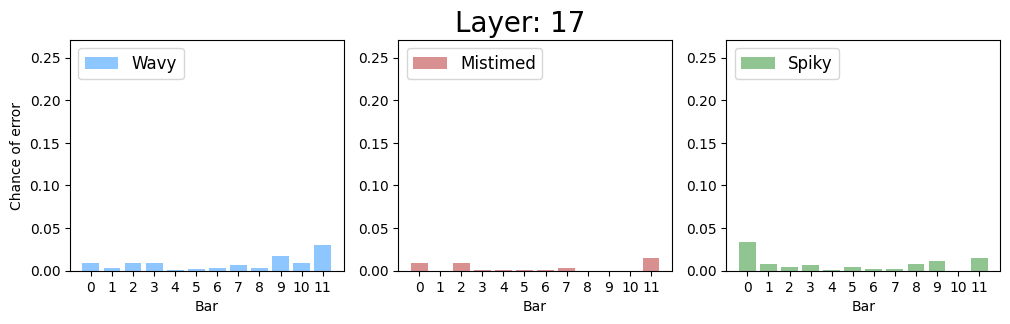

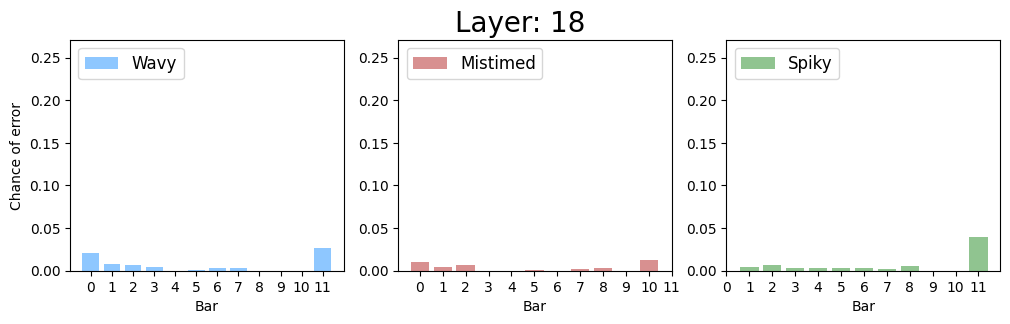

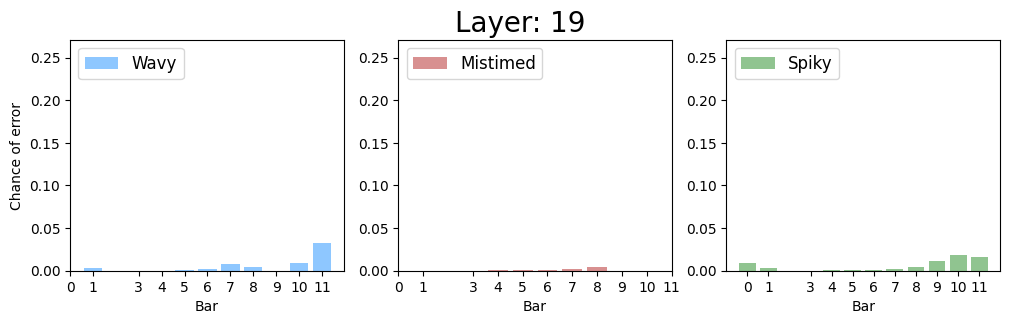

In [15]:
plot_error_by_bar(big_df, True,p_folder, False)